# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import RANDOM_STATE

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=RANDOM_STATE)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

_As features have different units and different scales, we need to normilize the data, so that all the features have the same scale._

In [5]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-3, 3, 10),
              'penalty': ['l1', 'l2']}

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=RANDOM_STATE)
model = GridSearchCV(model, param_grid, cv=5)
model.fit(X_train_std, y_train)

model.best_estimator_

LogisticRegression(C=46.41588833612773, max_iter=500, multi_class='multinomial',
                   penalty='l1', random_state=42, solver='saga', tol=0.001)

Weighted F1 Score 0.8188294078771624
Accuracy Score 0.8215488215488216


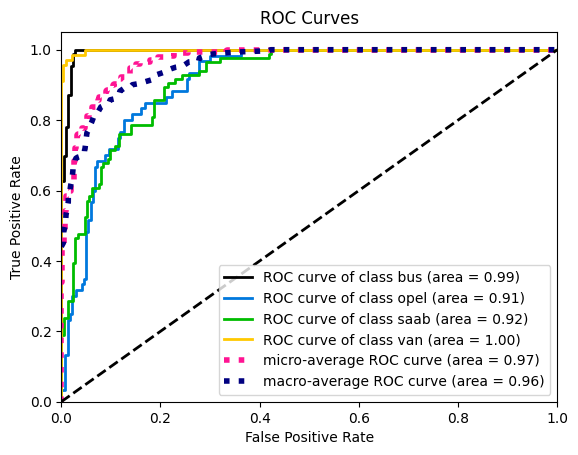

In [8]:
from utils import model_quality

model_quality(model.best_estimator_, X_test_std, y_test)

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [9]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_std)

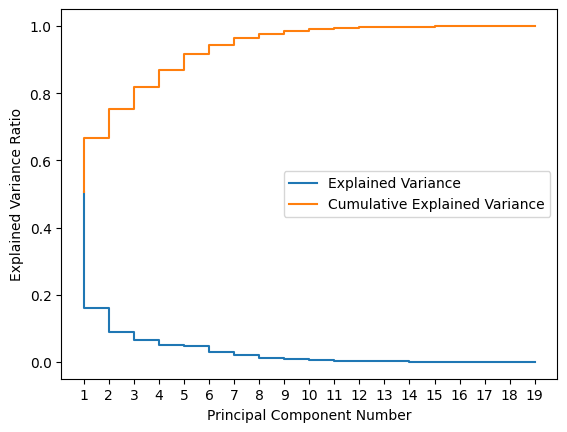

In [10]:
components = np.arange(1, pca.n_components_ + 1)
plt.step(components, pca.explained_variance_ratio_, label='Explained Variance')
plt.step(components, np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(min(components), max(components) + 1, 1.0))
plt.legend()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

_As the the number of features is relatively small, PCA is not really needed, so for educational purposes let's select the number of components that explain more than 99,9% of variance.
We should normilize the data, because if we don't PCA will just select the feautures with the largest scale, because they will naturally have the biggest variance._

In [11]:
### YOUR CODE HERE
pca = PCA(n_components=0.999, random_state=RANDOM_STATE)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(f'Resulting number of components: {pca.n_components_}')

Resulting number of components: 17


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [12]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                              ('PCA', PCA(n_components=0.999, random_state=RANDOM_STATE)),
                              ('model', LogisticRegression(multi_class='multinomial', solver='saga', 
                                                           tol=1e-3, max_iter=500, random_state=RANDOM_STATE))])

param_grid = {'model__C': np.logspace(-3, 3, 10),
              'model__penalty': ['l1', 'l2']}

logreg_gscv = GridSearchCV(logreg_pipe, param_grid, cv=5)
logreg_gscv.fit(X_train, y_train)

logreg_gscv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=0.999, random_state=42)),
                ('model',
                 LogisticRegression(C=46.41588833612773, max_iter=500,
                                    multi_class='multinomial', random_state=42,
                                    solver='saga', tol=0.001))])

Weighted F1 Score 0.8220541434962642
Accuracy Score 0.8249158249158249


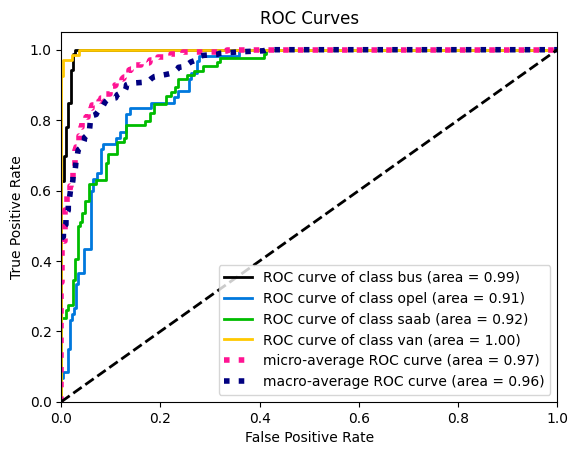

In [13]:
model_quality(logreg_gscv.best_estimator_, X_test, y_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [14]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

tree_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                            ('PCA', PCA(n_components=0.999, random_state=RANDOM_STATE)),
                            ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))])

param_grid = {'model__max_depth': np.arange(1, 10)}

tree_gscv = GridSearchCV(tree_pipe, param_grid, cv=5)
tree_gscv.fit(X_train, y_train)

tree_gscv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=0.999, random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

Weighted F1 Score 0.6700176522789598
Accuracy Score 0.67003367003367


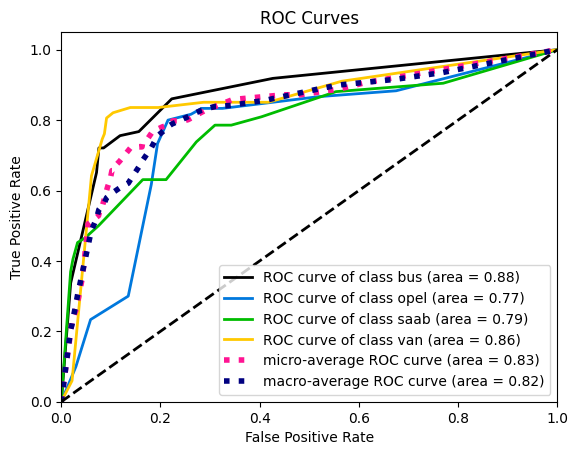

In [15]:
model_quality(tree_gscv.best_estimator_, X_test, y_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [16]:
# YOUR CODE HERE
from bagging_classifier import CustomBaggingClassifier
from sklearn.base import clone

N_MIN = 2
N_MAX = 100
STEP = 5

100%|██████████| 20/20 [00:00<00:00, 313.63it/s]

Best F1 0.8184044620943829, Number of estimators: 67
Best Accuracy 0.8215488215488216, Number of estimators: 27


(67, 27)

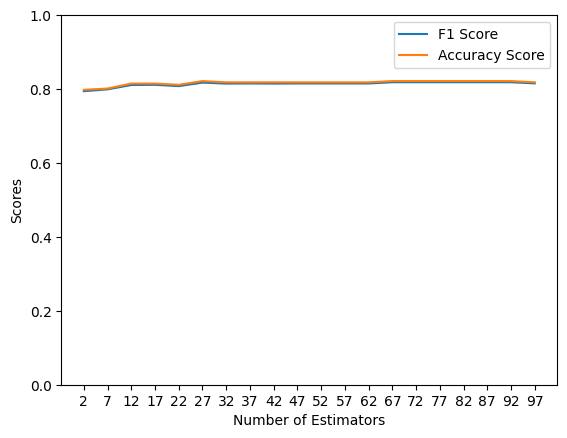

In [17]:
bagging_clf_logreg = CustomBaggingClassifier(base_estimator=clone(logreg_gscv.best_estimator_['model']),
                                             n_max_estimators=N_MAX, X=X_train_pca, y=y_train)
bagging_clf_logreg.fit()
bagging_clf_logreg.explore_ensemble_size(X=X_test_pca, y_true=y_test, 
                                         n_min=N_MIN, n_max=N_MAX, step=STEP)

100%|██████████| 20/20 [00:00<00:00, 353.43it/s]

Best F1 0.7584821598272357, Number of estimators: 52
Best Accuracy 0.7643097643097643, Number of estimators: 52


(52, 52)

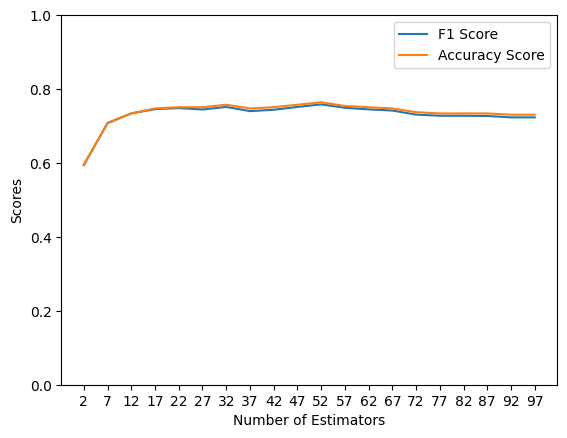

In [18]:
bagging_clf_tree = CustomBaggingClassifier(base_estimator=clone(tree_gscv.best_estimator_['model']),
                                           n_max_estimators=N_MAX, X=X_train_pca, y=y_train)
bagging_clf_tree.fit()
bagging_clf_tree.explore_ensemble_size(X=X_test_pca, y_true=y_test, 
                                       n_min=N_MIN, n_max=N_MAX, step=STEP)

_Hyperparameters found for a single tree in 2.5, won't be optimal for the ensemble, because a single tree has a weaker learning ability, so in order to learn something it gets deeper. On the other hand, ensemble is a more complex model itself and the deeper the trees are, the more the chance of overfiiting._

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

100%|██████████| 20/20 [00:00<00:00, 20.20it/s]

Best F1 0.7978670224295372, Number of estimators: 67
Best Accuracy 0.797979797979798, Number of estimators: 67


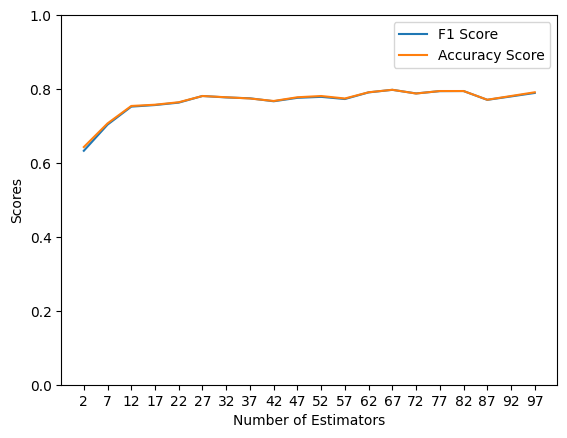

In [19]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from utils import explore_ensemble_size

n_estimators_rf = explore_ensemble_size(random_forest_model=RandomForestClassifier, 
                                        X_train=X_train_pca, y_train=y_train, 
                                        X_test=X_test_pca, y_true=y_test, 
                                        n_min=N_MIN, n_max=N_MAX, step=STEP)

_Optimal number that we got for the Random Forest differs from the optimal number in 2.6, because Random Forest tends to make base estimators even more different by not only training each estimator on a subsets of data, but also training each estimator on a subset of features._

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [20]:
# YOUR CODE HERE
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score

N_PARTS = 10
N_MODELS = 3

part_size = len(X_train) // N_PARTS
models = [clone(logreg_gscv.best_estimator_['model']), clone(tree_gscv.best_estimator_['model']), RandomForestClassifier(n_estimators_rf[0])]

f1_scores = np.zeros((N_PARTS, N_MODELS))
accuracy_scores = np.zeros((N_PARTS, N_MODELS))

for i in tqdm(range(N_PARTS)):
    X_part = X_train_pca[:part_size * (i + 1)]
    y_part = y_train[:part_size * (i + 1)]
    
    for j, model in enumerate(models):
        model.fit(X_part, y_part)
        y_pred = model.predict(X_test_pca)
        
        f1_scores[i, j] = f1_score(y_test, y_pred, average='weighted')
        accuracy_scores[i, j] = accuracy_score(y_test, y_pred)

100%|██████████| 10/10 [00:00<00:00, 12.29it/s]


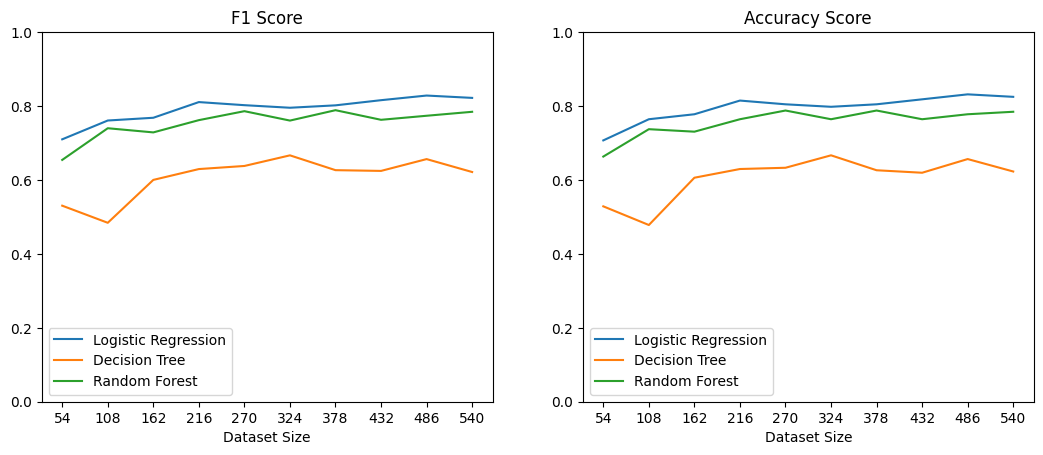

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (12.8, 4.8))

part_sizes = np.arange(1, 11) * part_size
ax[0].plot(part_sizes, f1_scores[:, 0], label='Logistic Regression')
ax[0].plot(part_sizes, f1_scores[:, 1], label='Decision Tree')
ax[0].plot(part_sizes, f1_scores[:, 2], label='Random Forest')
ax[0].set_xlabel('Dataset Size')
ax[0].set_title('F1 Score')
ax[0].set_ylim((0.0, 1.0))
ax[0].set_xticks(np.arange(min(part_sizes), max(part_sizes) + 1, part_size))
ax[0].legend()

ax[1].plot(part_sizes, accuracy_scores[:, 0], label='Logistic Regression')
ax[1].plot(part_sizes, accuracy_scores[:, 1], label='Decision Tree')
ax[1].plot(part_sizes, accuracy_scores[:, 2], label='Random Forest')
ax[1].set_xlabel('Dataset Size')
ax[1].set_title('Accuracy Score')
ax[1].set_ylim((0.0, 1.0))
ax[1].set_xticks(np.arange(min(part_sizes), max(part_sizes) + 1, part_size))
ax[1].legend()



_In the beggining, bigger dataset size gives a boost to the score value for all the models. Then it keeps steadily growing for Logistic Regression and Random Forest, and even decreases for Decision Tree. Thus we can deduct that dataset size is an important aspect, but it affects different models in different ways._